In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 300)

In [2]:
lst = [2020, 2021, 2022, 2023, 2024]
unit = 11

In [3]:
dfs = []
for i in range(len(lst) - 1):
  dfs.append(pd.read_excel(f'csv/{lst[i]}-{lst[i+1]}_NBA_Box_Score_Team-Stats.xlsx'))

In [4]:
dfs[-1] = dfs[-1].rename({'VENUE\n(R/H/N)' : 'VENUE'}, axis=1)
df = pd.concat(dfs)

In [5]:
nba_teams = {
    "Brooklyn": 1,
    "LA Lakers": 2,
    "Boston": 3,
    "Phoenix": 4,
    "Cleveland": 5,
    "Indiana": 6,
    "Orlando": 7,
    "Philadelphia": 8,
    "Toronto": 9,
    "Chicago": 10,
    "Memphis": 11,
    "Minnesota": 12,
    "Denver": 13,
    "Portland": 14,
    "Miami": 15,
    "Milwaukee": 16,
    "Charlotte": 17,
    "Detroit": 18,
    "Washington": 19,
    "New York": 20,
    "San Antonio": 21,
    "Utah": 22,
    "Sacramento": 23,
    "LA Clippers": 24,
    "New Orleans": 25,
    "Atlanta": 26,
    "Oklahoma City": 27,
    "Dallas": 28,
    "Houston": 29,
    "Golden State": 30
}

In [6]:
df.columns

Index(['BIGDATABALL\nDATASET', 'GAME-ID', 'DATE', 'TEAM', 'VENUE', '1Q', '2Q',
       '3Q', '4Q', 'OT1', 'OT2', 'OT3', 'OT4', 'OT5', 'F', 'MIN', 'FG', 'FGA',
       '3P', '3PA', 'FT', 'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO',
       'TO\nTO', 'BL', 'PTS', 'POSS', 'PACE', 'OEFF', 'DEFF',
       'TEAM\nREST DAYS', 'STARTING LINEUPS', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'MAIN REF', 'CREW', 'OPENING ODDS',
       'OPENING SPREAD', 'OPENING TOTAL', 'LINE \nMOVEMENT #1',
       'LINE \nMOVEMENT #2', 'LINE \nMOVEMENT #3', 'CLOSING\nODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'MONEYLINE', 'HALFTIME',
       'BOX SCORE\nURL', 'FULL GAME\nODDS URL', 'CREW CHIEF',
       'REFEREE\n&\nUMPIRE'],
      dtype='object')

In [7]:
df['type'] = df['BIGDATABALL\nDATASET'].apply(lambda x: x.split()[2])

In [8]:
reg = df[df['type'] == 'Regular']

In [9]:
reg['STARTING LINEUPS']

0           Andrew Wiggins
1               Joe Harris
2            Kawhi Leonard
3             LeBron James
4          Khris Middleton
               ...        
2457        Brandon Ingram
2458         Grayson Allen
2459       Jaden McDaniels
2460    Michael Porter Jr.
2461            GG Jackson
Name: STARTING LINEUPS, Length: 9408, dtype: object

In [10]:
reg.columns

Index(['BIGDATABALL\nDATASET', 'GAME-ID', 'DATE', 'TEAM', 'VENUE', '1Q', '2Q',
       '3Q', '4Q', 'OT1', 'OT2', 'OT3', 'OT4', 'OT5', 'F', 'MIN', 'FG', 'FGA',
       '3P', '3PA', 'FT', 'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO',
       'TO\nTO', 'BL', 'PTS', 'POSS', 'PACE', 'OEFF', 'DEFF',
       'TEAM\nREST DAYS', 'STARTING LINEUPS', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'MAIN REF', 'CREW', 'OPENING ODDS',
       'OPENING SPREAD', 'OPENING TOTAL', 'LINE \nMOVEMENT #1',
       'LINE \nMOVEMENT #2', 'LINE \nMOVEMENT #3', 'CLOSING\nODDS',
       'CLOSING SPREAD', 'CLOSING TOTAL', 'MONEYLINE', 'HALFTIME',
       'BOX SCORE\nURL', 'FULL GAME\nODDS URL', 'CREW CHIEF',
       'REFEREE\n&\nUMPIRE', 'type'],
      dtype='object')

In [11]:
game_metadata = ['BIGDATABALL\nDATASET', 'GAME-ID', 'DATE', 'TEAM', 'VENUE']
game_stats = ['F', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS', 'POSS', 'PACE', 'OEFF', 'DEFF']
game_stats_avg = [x + '_mean' for x in game_stats]
starters = ['STARTING LINEUPS', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41']

In [12]:
data = reg[game_metadata + game_stats + starters]

In [13]:
aggs = data.set_index('GAME-ID').groupby(['BIGDATABALL\nDATASET', 'TEAM'])[game_stats].expanding().mean().rename(lambda x: x+ "_mean", axis=1).groupby(['BIGDATABALL\nDATASET', 'TEAM']).shift(1).reset_index()

In [14]:
final = pd.merge(data, aggs, on = ['BIGDATABALL\nDATASET', 'TEAM', 'GAME-ID'])

In [15]:
totals = data.groupby('GAME-ID').sum()['PTS'].reset_index().rename({'PTS':'y'}, axis=1)

In [16]:
final = pd.merge(final, totals, on = 'GAME-ID')

In [17]:
x_vars = game_metadata + game_stats_avg

In [18]:
final[x_vars].sort_values(['BIGDATABALL\nDATASET', 'TEAM'])

,BIGDATABALL\nDATASET,GAME-ID,DATE,TEAM,VENUE,F_mean,MIN_mean,FG_mean,FGA_mean,3P_mean,...,A_mean,PF_mean,ST_mean,TO_mean,BL_mean,PTS_mean,POSS_mean,PACE_mean,OEFF_mean,DEFF_mean
18,NBA 2020-2021 Regular Season,22000015,12/23/2020,Atlanta,R,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NBA 2020-2021 Regular Season,22000021,12/26/2020,Atlanta,R,124.000000,240.000000,43.000000,80.000000,14.000000,...,24.000000,29.000000,6.000000,21.000000,3.000000,124.000000,105.874783,105.874783,117.119485,98.229245
79,NBA 2020-2021 Regular Season,22000041,12/28/2020,Atlanta,H,123.000000,240.000000,40.500000,84.500000,13.500000,...,23.500000,24.500000,5.000000,18.000000,4.000000,123.000000,105.143941,105.143941,116.981531,102.747740
110,NBA 2020-2021 Regular Season,22000057,12/30/2020,Atlanta,R,124.666667,240.000000,40.333333,83.666667,15.666667,...,25.666667,23.666667,5.000000,16.333333,5.000000,124.666667,102.705075,102.705075,121.601942,109.386857
140,NBA 2020-2021 Regular Season,22000072,01/01/2021,Atlanta,R,128.750000,240.000000,42.000000,87.500000,16.250000,...,26.000000,22.500000,5.000000,15.250000,4.250000,128.750000,103.761827,103.761827,124.166305,115.940165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,NBA 2023-2024 Regular Season,22301117,04/05/2024,Washington,H,113.356164,240.684932,42.890411,91.602740,12.191781,...,27.808219,19.821918,7.767123,13.616438,5.041096,113.356164,103.000140,102.725736,110.026510,119.189035
9276,NBA 2023-2024 Regular Season,22301137,04/07/2024,Washington,R,113.202703,240.675676,42.824324,91.554054,12.094595,...,27.756757,19.837838,7.783784,13.554054,5.040541,113.202703,102.929153,102.658458,109.949813,119.071469
9306,NBA 2023-2024 Regular Season,22301152,04/09/2024,Washington,R,113.320000,240.666667,42.813333,91.520000,12.146667,...,27.773333,19.906667,7.800000,13.573333,5.120000,113.320000,103.020985,102.753899,109.965073,119.062240
9349,NBA 2023-2024 Regular Season,22301172,04/12/2024,Washington,H,113.421053,240.657895,42.828947,91.486842,12.250000,...,27.750000,19.934211,7.763158,13.565789,5.105263,113.421053,102.980904,102.717333,110.110670,119.206588


In [19]:
games = pd.merge(final[final.VENUE == 'H'][x_vars + ['y']], final[final.VENUE == 'R'][x_vars + ['y']], on=['BIGDATABALL\nDATASET', 'DATE', 'GAME-ID', 'y'])

In [20]:
games = games.rename({'BIGDATABALL\nDATASET': 'Season'}, axis=1)

In [21]:
final_x_vars = list(set(games.columns.to_list()) - set(['y']))

In [22]:
import lightgbm as lgb

In [23]:
games['Season'] = games['Season'].apply(lambda x: int(x.split()[1].split('-')[0]))

In [24]:
games['TEAM_x'] = games['TEAM_x'].apply(lambda x: nba_teams[x])
games['TEAM_y'] = games['TEAM_y'].apply(lambda x: nba_teams[x])

In [25]:
games['VENUE_x'] = games['TEAM_x']
games['VENUE_y'] = games['TEAM_x']

In [26]:
games['DATE'] = games.DATE.apply(lambda x: int(int(x.split('/')[2]) * 1e4 + int(x.split('/')[0]) * 1e2 + int(x.split('/')[1])))

In [27]:
games

,Season,GAME-ID,DATE,TEAM_x,VENUE_x,F_mean_x,MIN_mean_x,FG_mean_x,FGA_mean_x,3P_mean_x,...,A_mean_y,PF_mean_y,ST_mean_y,TO_mean_y,BL_mean_y,PTS_mean_y,POSS_mean_y,PACE_mean_y,OEFF_mean_y,DEFF_mean_y
0,2020,22000001,20201222,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,22000002,20201222,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,22000003,20201223,3,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,22000004,20201223,4,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,22000010,20201223,5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,2023,22301197,20240414,21,21,112.207792,241.935065,41.844156,90.493506,12.636364,...,25.519481,20.727273,6.467532,14.584416,4.584416,110.077922,100.249710,99.853209,109.821550,118.484916
4698,2023,22301196,20240414,27,27,120.116883,241.610390,44.506494,89.324675,13.350649,...,25.714286,18.207792,6.844156,12.038961,5.051948,118.038961,100.180487,100.047318,117.791321,114.865035
4699,2023,22301195,20240414,25,25,115.320000,240.280000,42.533333,87.360000,12.573333,...,28.440000,15.613333,7.280000,13.373333,5.560000,117.626667,102.007049,101.010660,115.292310,116.583939
4700,2023,22301194,20240414,12,12,113.246753,241.610390,41.545455,85.389610,12.701299,...,27.105263,17.815789,7.342105,14.184211,6.092105,116.105263,99.105667,98.582308,117.292398,114.696982


In [28]:
train = games[games['Season'] != 2023]

In [29]:
test = games[games['Season'] == 2023]

In [30]:
train_data = lgb.Dataset(train[final_x_vars], label = train['y'])

In [31]:
test_data = lgb.Dataset(test[final_x_vars], label = test['y'])

In [52]:
params = {
    "objective": "regression",
    "boosting_type": "rf",
    "num_leaves": 12,
    "force_row_wise": True,
    "learning_rate": 0.01,
    "bagging_fraction": 0.01,
    "feature_fraction": 0.01
}
# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Info] Total Bins 11318
[LightGBM] [Info] Number of data points in the train set: 3540, number of used features: 49
[LightGBM] [Info] Start training from score 224.960169
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [53]:
lines = pd.merge(test, reg[['GAME-ID', 'OPENING TOTAL']].drop_duplicates(), on = 'GAME-ID')

In [54]:
lines['pred'] = pd.Series(bst.predict(test[final_x_vars]))

In [55]:
preds = lines[['DATE', 'y', 'OPENING TOTAL', 'pred']]

In [56]:
preds['OU'] = np.sign(preds.pred - preds['OPENING TOTAL'])

/var/folders/kd/kpwj_zw52bjbbtxgq2psc1080000gn/T/ipykernel_49146/1577859951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['OU'] = np.sign(preds.pred - preds['OPENING TOTAL'])


In [57]:
preds['Outcome'] = np.sign(preds.y - preds['OPENING TOTAL'])

/var/folders/kd/kpwj_zw52bjbbtxgq2psc1080000gn/T/ipykernel_49146/2002246133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Outcome'] = np.sign(preds.y - preds['OPENING TOTAL'])


In [58]:
(preds.OU == preds.Outcome).value_counts()

True     617
False    545
Name: count, dtype: int64

In [59]:
(preds.OU == preds.Outcome).value_counts().loc[True] / preds.shape[0]

0.5309810671256454

In [60]:
(preds.OU == preds.Outcome).value_counts().loc[True] / preds.shape[0] - 11/21

0.007171543316121576

In [61]:
preds.corr()

,DATE,y,OPENING TOTAL,pred,OU,Outcome
DATE,1.000000,-0.102662,-0.074140,0.352988,0.111981,-0.087152
y,-0.102662,1.000000,0.444879,0.170412,-0.347556,0.690779
OPENING TOTAL,-0.074140,0.444879,1.000000,0.422172,-0.783262,-0.057761
pred,0.352988,0.170412,0.422172,1.000000,-0.267063,-0.068049
OU,0.111981,-0.347556,-0.783262,-0.267063,1.000000,0.059474
Outcome,-0.087152,0.690779,-0.057761,-0.068049,0.059474,1.000000


In [62]:
preds['DATE'] = pd.to_datetime(preds['DATE'].apply(str), format = "%Y%m%d") 

/var/folders/kd/kpwj_zw52bjbbtxgq2psc1080000gn/T/ipykernel_49146/1270250952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['DATE'] = pd.to_datetime(preds['DATE'].apply(str), format = "%Y%m%d")


In [63]:
preds['pnl'] = np.where(preds.OU == preds.Outcome, unit * 10/11, -unit)

/var/folders/kd/kpwj_zw52bjbbtxgq2psc1080000gn/T/ipykernel_49146/135542864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['pnl'] = np.where(preds.OU == preds.Outcome, unit * 10/11, -unit)


In [64]:
preds['correct'] = preds.OU * preds.Outcome

/var/folders/kd/kpwj_zw52bjbbtxgq2psc1080000gn/T/ipykernel_49146/2614251419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['correct'] = preds.OU * preds.Outcome


<Axes: xlabel='DATE'>

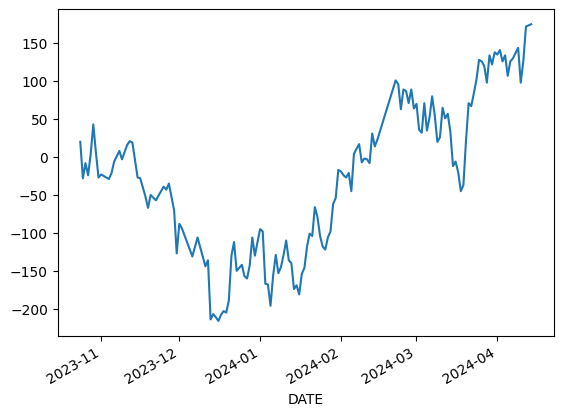

In [65]:
preds.groupby('DATE').pnl.sum().cumsum().plot()

In [66]:
preds.groupby('DATE').pnl.sum()

DATE
2023-10-24    20.0
2023-10-25   -48.0
2023-10-26    20.0
2023-10-27   -16.0
2023-10-28    28.0
2023-10-29    39.0
2023-10-30   -37.0
2023-10-31   -33.0
2023-11-01     4.0
2023-11-02    -2.0
2023-11-04    -4.0
2023-11-05     8.0
2023-11-06    15.0
2023-11-08    14.0
2023-11-09   -11.0
2023-11-11    19.0
2023-11-12     5.0
2023-11-13    -2.0
2023-11-15   -46.0
2023-11-16    -1.0
2023-11-18   -24.0
2023-11-19   -15.0
2023-11-20    17.0
2023-11-22    -7.0
2023-11-25    18.0
2023-11-26    -4.0
2023-11-27     8.0
2023-11-29   -35.0
2023-11-30   -57.0
2023-12-01    39.0
2023-12-02    -6.0
2023-12-06   -37.0
2023-12-08    25.0
2023-12-11   -38.0
2023-12-12     8.0
2023-12-13   -78.0
2023-12-14     7.0
2023-12-15    -4.0
2023-12-16    -5.0
2023-12-17     8.0
2023-12-18     5.0
2023-12-19    -2.0
2023-12-20    16.0
2023-12-21    59.0
2023-12-22    18.0
2023-12-23   -38.0
2023-12-25     8.0
2023-12-26   -15.0
2023-12-27    -3.0
2023-12-28    17.0
2023-12-29    37.0
2023-12-30   -24.0
2023-12

In [67]:
preds.groupby("DATE").correct.value_counts().reset_index().sort_values(['DATE', 'correct'])

,DATE,correct,count
0,2023-10-24,1.0,2
1,2023-10-25,-1.0,8
2,2023-10-25,1.0,4
3,2023-10-26,1.0,2
4,2023-10-27,-1.0,6
5,2023-10-27,1.0,5
7,2023-10-28,-1.0,2
6,2023-10-28,1.0,5
9,2023-10-29,-1.0,1
8,2023-10-29,1.0,5
